In [3]:
import numpy as np
import scipy as ci 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.gridspec as gridspec
from IPython.display import display, HTML
from sklearn.externals import joblib
from scipy import stats
from scipy.optimize import minimize

import seaborn as sns 
import random
import tables 
import pickle
import warnings
warnings.filterwarnings('once')

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

In [4]:
plt.figure()
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams.update({'font.size': 12})
plt.rc('axes', axisbelow=True)

<Figure size 432x288 with 0 Axes>

In [5]:
lifetime = 86400*365 # 1 year! 
fig_dir = '/Users/yang/Desktop/IceCube/Codes/my_proj/analysis_1_downgoing_neutrino/1_distribution_plots/plots/realtime-'
data_dir = '/Users/yang/Desktop/IceCube/Codes/my_proj/analysis_1_downgoing_neutrino/data/'
plt.rcParams.update({'font.size': 14})
plt.rc('axes', axisbelow=True)

In [35]:
# with tables.open_file(data_dir+'data_h5/data_burn.h5','r') as f:
# with tables.open_file(data_dir+'data_h5/data_burn_new.h5','r') as f: # 8 years
with tables.open_file(data_dir+'data_h5/data_burn_new_Tank.h5','r') as f: # 8 years

    nfile_data = [2831731.134,3081951.304,3158084.037,3155703.188,3082765.564,3550407.43,3186599.156,2706824.349]

#     ineff_ = ineff_model_new(f.root.Dist_to_IT_center.cols.value[:],np.log10(f.root.SplineMPETruncatedEnergy_SPICEMie_BINS_Muon.cols.energy[:]))

    CUT_dedx = f.root.Collection.cols.len_dEdxVector[:] >= 6
    CUT_cascllh = f.root.CascadeLlhVertexFitParams.cols.rlogL[:] < 18
    CUT_d_IC = f.root.Dist_to_IC_center.cols.value[:] < 450
    CUT_LdirC = f.root.SplineMPEDirectHitsC.cols.dir_track_length[:] > 600
    CUT_balloon = f.root.Balloon.cols.InIceBalloonParameter[:] < 0.22
    CUT_toposplit = f.root.TologicalCounterSplitCount.cols.value[:] == 1

    CUT = CUT_dedx & CUT_cascllh & CUT_d_IC & CUT_LdirC & CUT_balloon & CUT_toposplit
    
#     ineff_data_burn = ineff_[CUT]

    chi2_red_data_burn = f.root.Collection.cols.chi2_red[:][CUT]
    chi2_red_new_data_burn = f.root.Collection.cols.chi2_red_new[:][CUT]
    PeakOverMedian_data_burn = f.root.Collection.cols.PeakOverMedian[:][CUT]
    stoch_data_burn = (chi2_red_data_burn + (np.log10(PeakOverMedian_data_burn)/2))/np.sqrt(2)

    zenith_data_burn = f.root.SplineMPE.cols.zenith[:][CUT]
    truncated_muon_e_data_burn = f.root.SplineMPETruncatedEnergy_SPICEMie_BINS_Muon.cols.energy[:][CUT]
    len_dedx_data_burn = f.root.Collection.cols.len_dEdxVector[:][CUT]
    cascllh_data_burn = f.root.CascadeLlhVertexFitParams.cols.rlogL[:][CUT]
    NPE_data_burn = f.root.QTot.cols.value[:][CUT]
    Qtot_data_burn = f.root.Balloon.cols.InIceTotalCharge[:][CUT]
    N_dom_data_burn = f.root.Balloon.cols.N_Doms[:][CUT]
#     N_pulses_data_burn = f.root.Balloon.cols.N_Pulses[:][CUT]
    balloon_data_burn = f.root.Balloon.cols.InIceBalloonParameter[:][CUT]

    closest_d_data_burn = f.root.Closest_approach_dist_to_nearest_IT_dom.cols.value[:][CUT]
    d_to_IC_center_data_burn = f.root.Dist_to_IC_center.cols.value[:][CUT]
    d_to_IT_center_data_burn = f.root.Dist_to_IT_center.cols.value[:][CUT]
    Ldir_data_burn = f.root.SplineMPEDirectHitsC.cols.dir_track_length[:][CUT]

    IT_Npulse_data_burn = f.root.IT_veto_double_Tank.cols.num_Total_hits[:][CUT]
    Npulse_in_window_data_burn = f.root.IT_veto_double_Tank.cols.num_correlated_Total_hits_in_window[:][CUT]
    Npulse_off_window_data_burn = f.root.IT_veto_double_Tank.cols.num_correlated_Total_hits_off_window[:][CUT]

    # use TANK pulse!!
    passed_2_data_burn = (f.root.IT_veto_double_Tank.cols.flag_window_2[:][CUT]).astype(bool) # 1 if passed 
    vetoed_2_data_burn = (1 - f.root.IT_veto_double_Tank.cols.flag_window_2[:][CUT]).astype(bool) 
    
    runid_data_burn = f.root.I3EventHeader.cols.Run[:][CUT]
    eventid_data_burn = f.root.I3EventHeader.cols.Event[:][CUT]

/Users/yang/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in greater
  if sys.path[0] == '':


# which pulse to use?

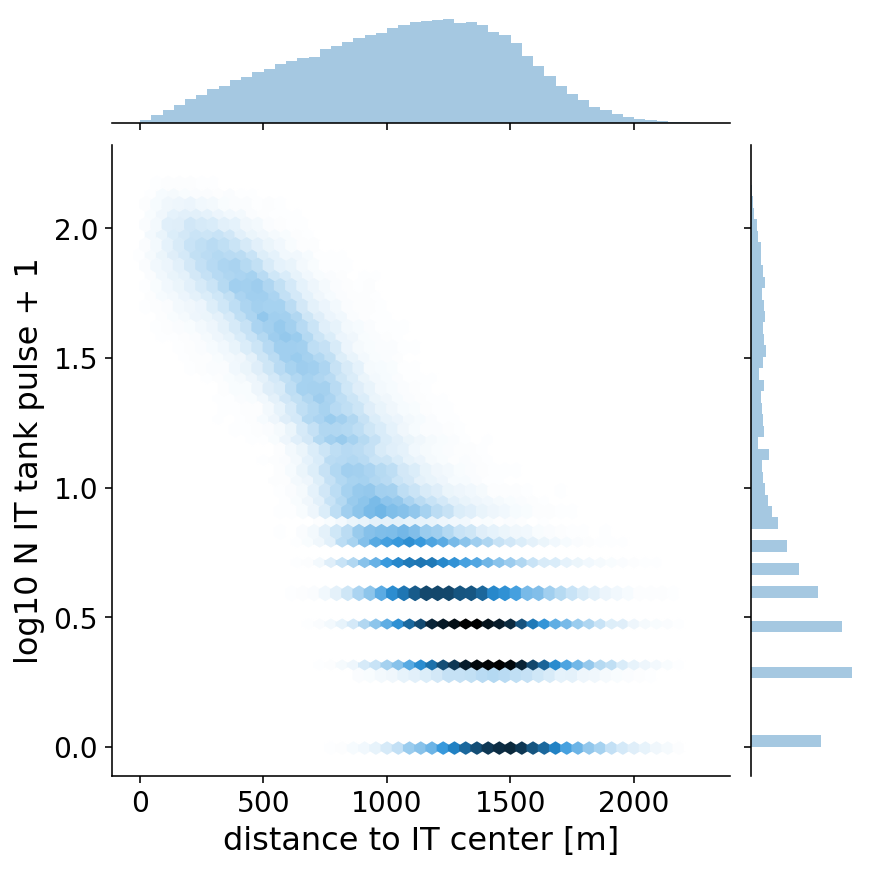

In [99]:
h = sns.jointplot(d_to_IT_center_data_burn, np.log10(Npulse_in_window_data_burn+1),kind='hex')
h.set_axis_labels('distance to IT center [m]', 'log10 N IT tank pulse + 1', fontsize=16)
plt.show()

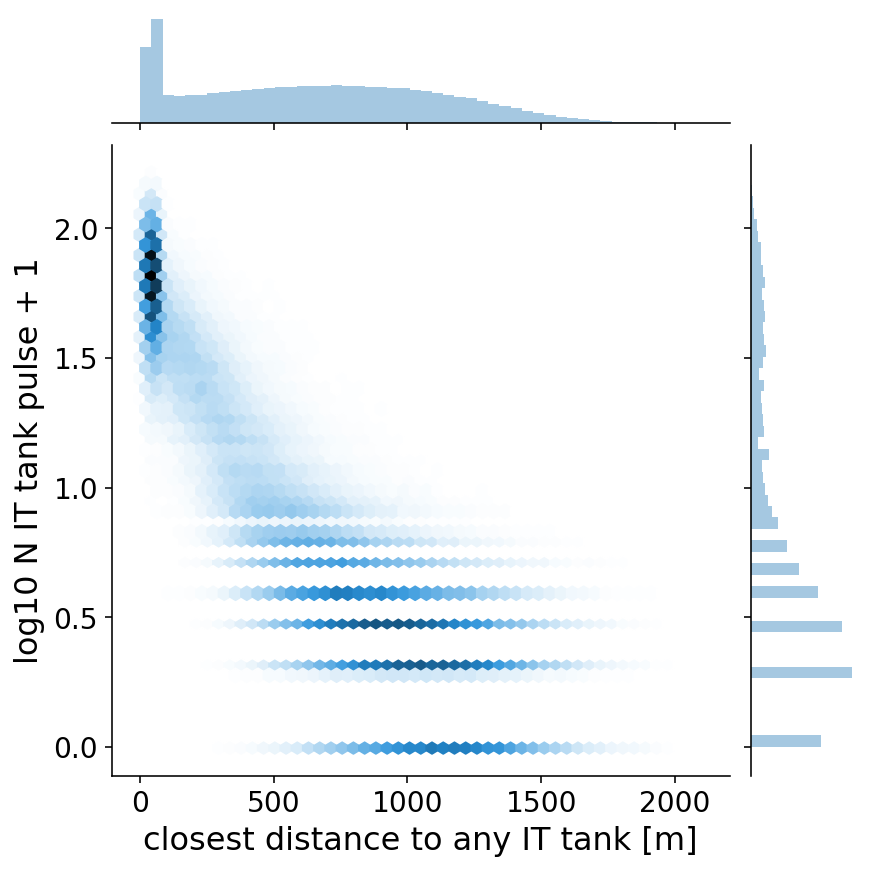

In [53]:
h = sns.jointplot(closest_d_data_burn, np.log10(Npulse_in_window_data_burn+1),kind='hex')
h.set_axis_labels('closest distance to any IT tank [m]', 'log10 N IT tank pulse + 1', fontsize=16)
plt.show()

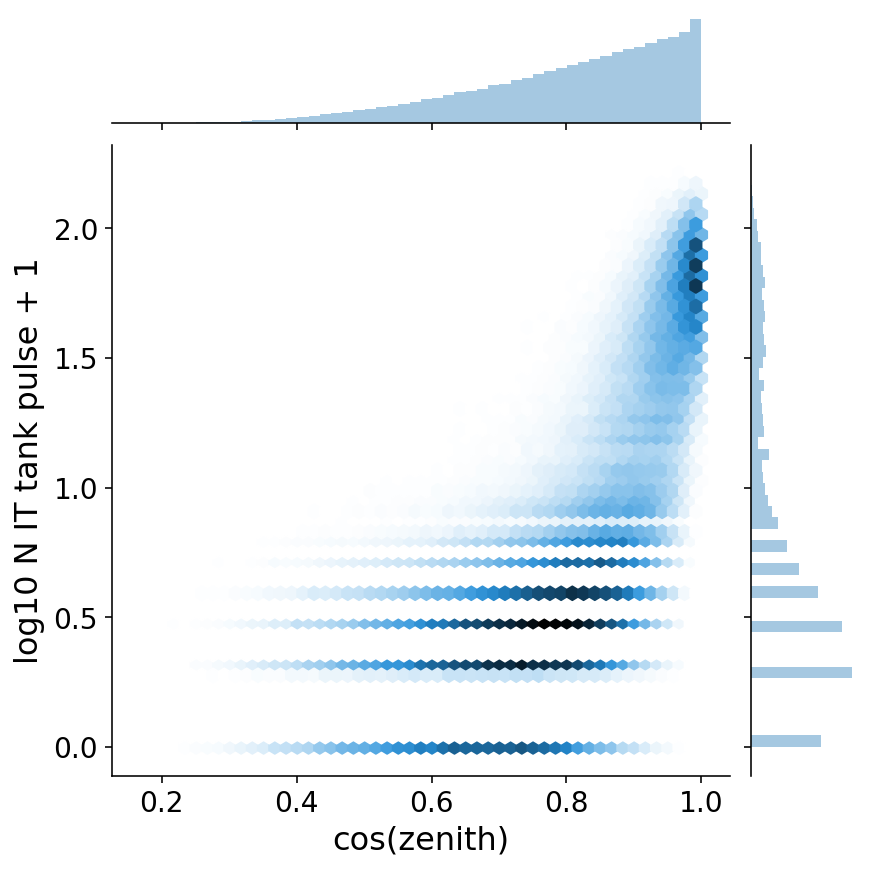

In [55]:
h = sns.jointplot(np.cos(zenith_data_burn), np.log10(Npulse_in_window_data_burn+1),kind='hex')
h.set_axis_labels('cos(zenith)', 'log10 N IT tank pulse + 1', fontsize=16)
plt.show()

# background hit rates?

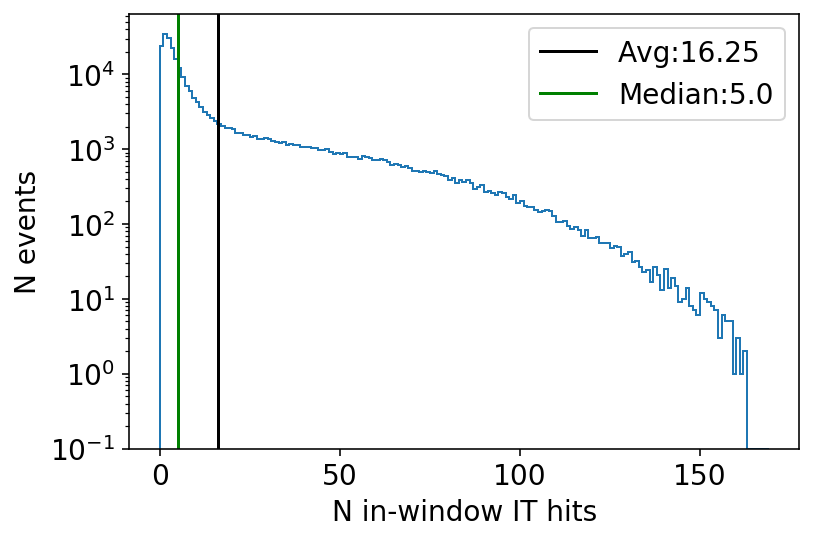

In [109]:
plt.hist(Npulse_in_window_data_burn,log=True,histtype='step',bins=np.arange(0,170,1))
plt.axvline(np.mean(Npulse_in_window_data_burn),color='black',label='Avg:'+str(np.round(np.mean(Npulse_in_window_data_burn),2)))
plt.axvline(np.median(Npulse_in_window_data_burn),color='green',label='Median:'+str(np.round(np.median(Npulse_in_window_data_burn),2)))
plt.legend()
plt.xlabel('N in-window IT hits')
plt.ylabel('N events')
plt.show()

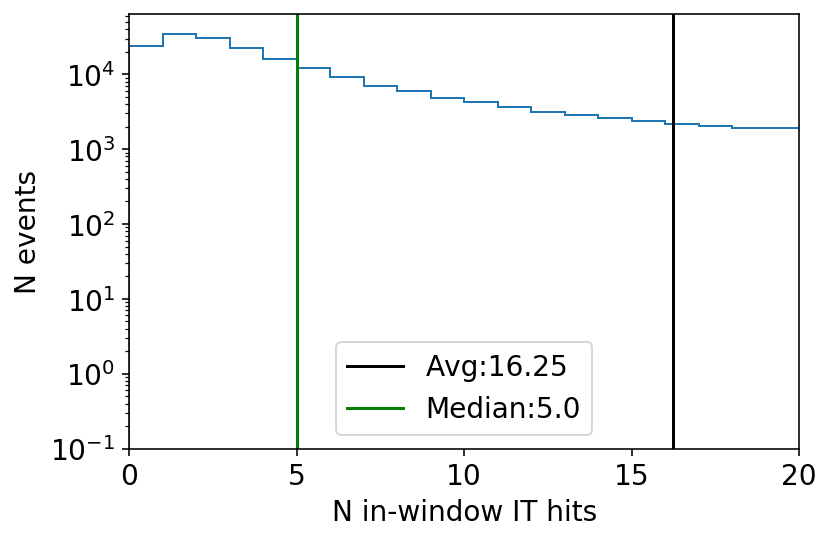

In [114]:
plt.hist(Npulse_in_window_data_burn,log=True,histtype='step',bins=np.arange(0,170,1))
plt.axvline(np.mean(Npulse_in_window_data_burn),color='black',label='Avg:'+str(np.round(np.mean(Npulse_in_window_data_burn),2)))
plt.axvline(np.median(Npulse_in_window_data_burn),color='green',label='Median:'+str(np.round(np.median(Npulse_in_window_data_burn),2)))
plt.legend()
plt.xlim(0,20)
plt.xlabel('N in-window IT hits')
plt.ylabel('N events')
plt.show()

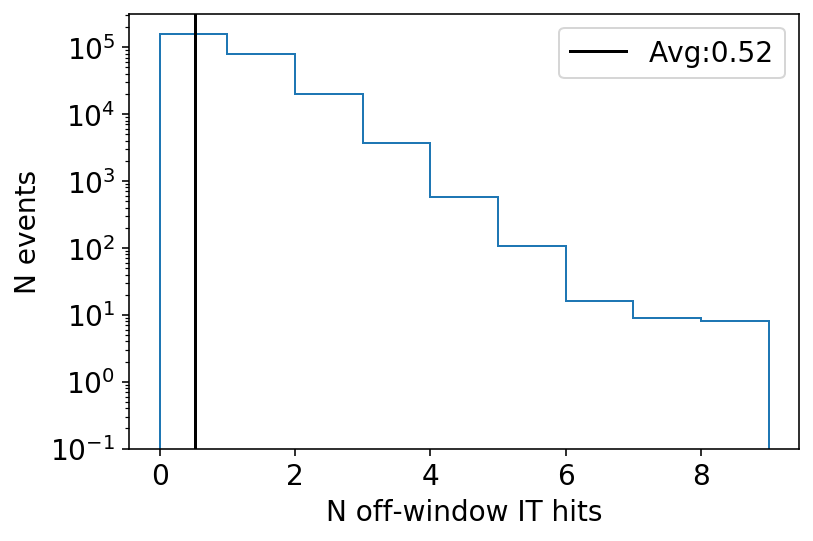

In [115]:
plt.hist(Npulse_off_window_data_burn,log=True,histtype='step',bins=np.arange(0,10,1))
plt.axvline(np.mean(Npulse_off_window_data_burn),color='black',label='Avg:'+str(np.round(np.mean(Npulse_off_window_data_burn),2)))
plt.legend()
plt.xlabel('N off-window IT hits')
plt.ylabel('N events')
plt.show()

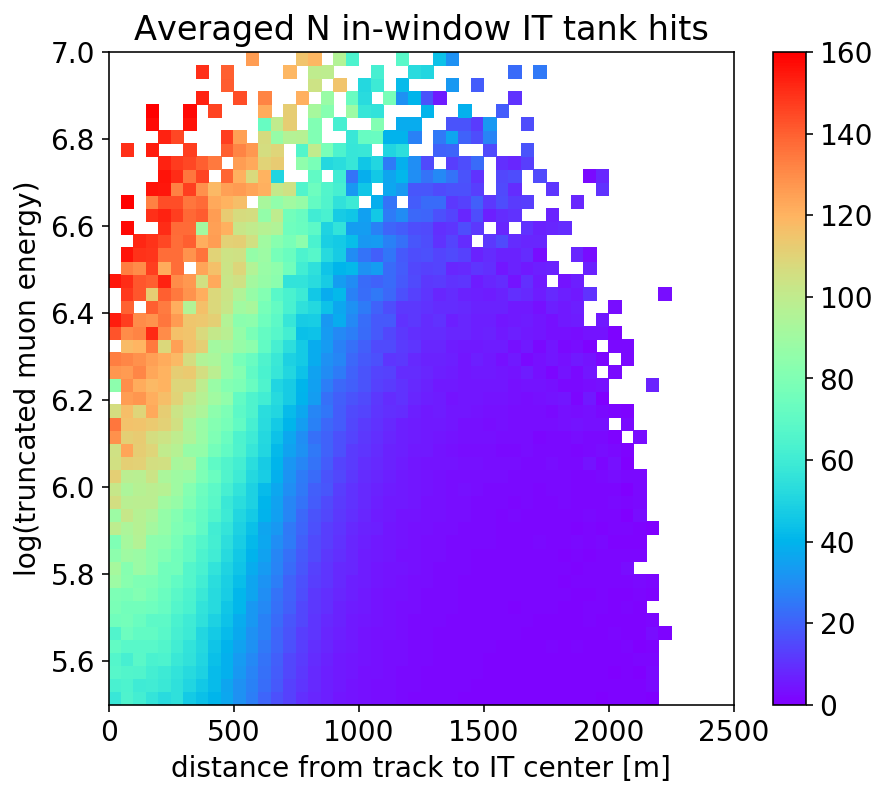

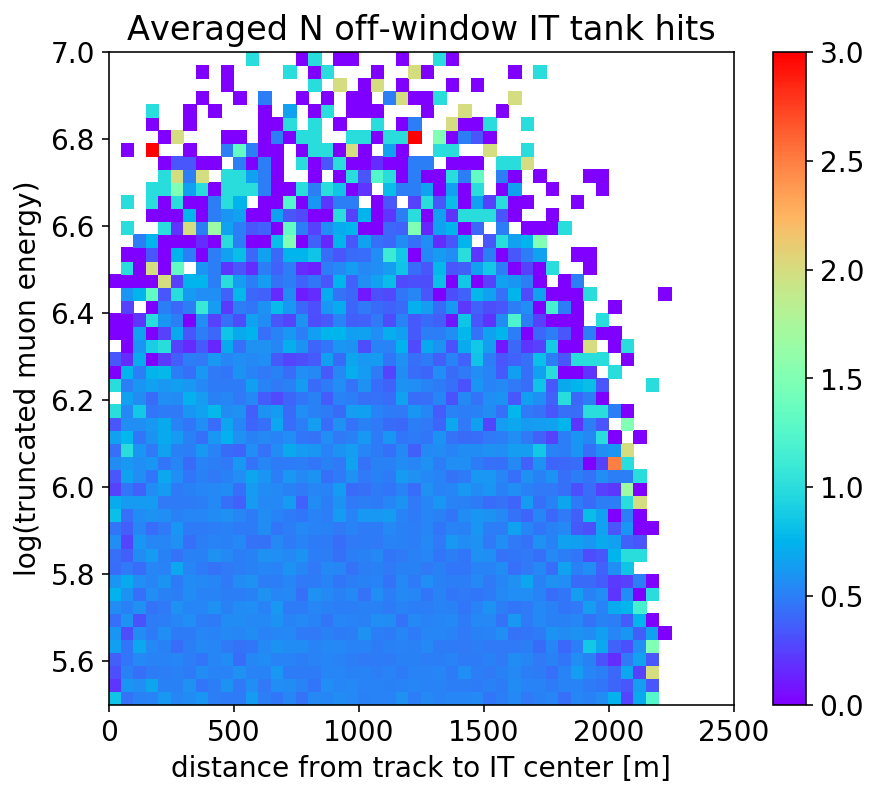

In [112]:
" ===== 1. IT Ineff from Data  ===== "
" ----- IT ineff from data -----"
n_ = 50
emax = 7
e_spacing = (emax-5.5)/n_
d_spacing = (2500)/n_

Dist = []
Energy = []
Npulse_avg_in_window = []
Npulse_avg_off_window = []
for energy in np.linspace(5.5,emax,n_): # in each energy range [e1,e2]
    for dist in np.linspace(0,2500,n_): # in each dist range
        # energy cut  

        CUT_energy = (truncated_muon_e_data_burn>10**energy)&(truncated_muon_e_data_burn<10**(energy+e_spacing))
        CUT_dist = (d_to_IT_center_data_burn>dist)&(d_to_IT_center_data_burn<(dist+d_spacing))
        CUT = CUT_energy & CUT_dist

        closest_d_binned = d_to_IT_center_data_burn[CUT]
        Npulse_in_window_data_burn_binned = Npulse_in_window_data_burn[CUT] 
        Npulse_off_window_data_burn_binned = Npulse_off_window_data_burn[CUT] 

        Npulse_avg_in_window = np.append(Npulse_avg_in_window, np.mean(Npulse_in_window_data_burn_binned) ) 
        Npulse_avg_off_window = np.append(Npulse_avg_off_window, np.mean(Npulse_off_window_data_burn_binned) ) 

        Dist = np.append(Dist, dist)
        Energy = np.append(Energy,energy)
        
my_cmap = matplotlib.cm.get_cmap('rainbow')
my_cmap.set_under('w')

plt.figure(figsize=(7,6))
# plt.plot(t,lowstat,color='black')
h,yy,xx,img=plt.hist2d(Dist,Energy,bins=[n_,n_],weights=Npulse_avg_in_window,cmap=my_cmap,vmin=0.0) # ,range=[[0,2500],[5.5,emax]],range=[[0,2500],[5.5,emax]],bins=[n_,n_],
plt.colorbar()
# CS=plt.contour(h.transpose(),extent=[0,2500,5.5,emax],lw=1,levels=[0.2,0.4,0.6,0.8])
# plt.clabel(CS,inline=1,fmt='%1.1f',fontsize=10)
# plt.clim(0,1)
plt.xlabel('distance from track to IT center [m]')
plt.ylabel('log(truncated muon energy)')
plt.xlim(0,2500)
plt.ylim(5.5,emax)
plt.title('Averaged N in-window IT tank hits')

plt.figure(figsize=(7,6))
# plt.plot(t,lowstat,color='black')
my_cmap = matplotlib.cm.get_cmap('rainbow')
my_cmap.set_under('w')
h,yy,xx,img=plt.hist2d(Dist,Energy,bins=[n_,n_],weights=Npulse_avg_off_window,cmap=my_cmap,vmin=0.0) # ,range=[[0,2500],[5.5,7]],range=[[0,2500],[5.5,7]],bins=[n_,n_],
plt.colorbar()
# CS=plt.contour(h.transpose(),extent=[0,2500,5.5,7],lw=1,levels=[0.2,0.4,0.6,0.8])
# plt.clabel(CS,inline=1,fmt='%1.1f',fontsize=10)
plt.clim(0,3)
plt.xlabel('distance from track to IT center [m]')
plt.ylabel('log(truncated muon energy)')
plt.xlim(0,2500)
plt.ylim(5.5,7)
plt.title('Averaged N off-window IT tank hits')

plt.show()

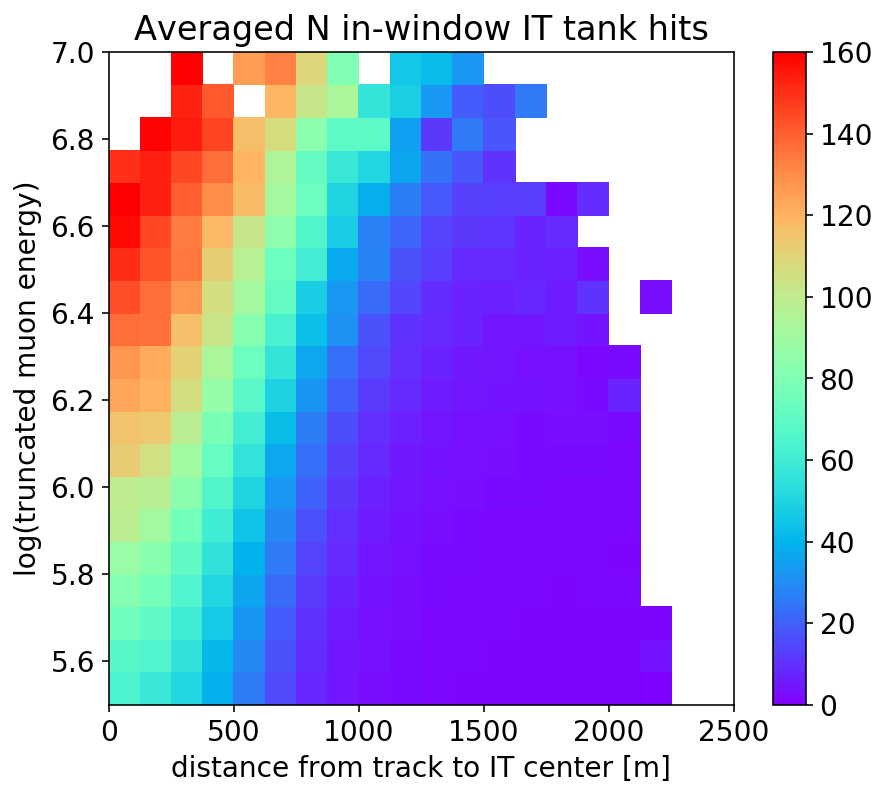

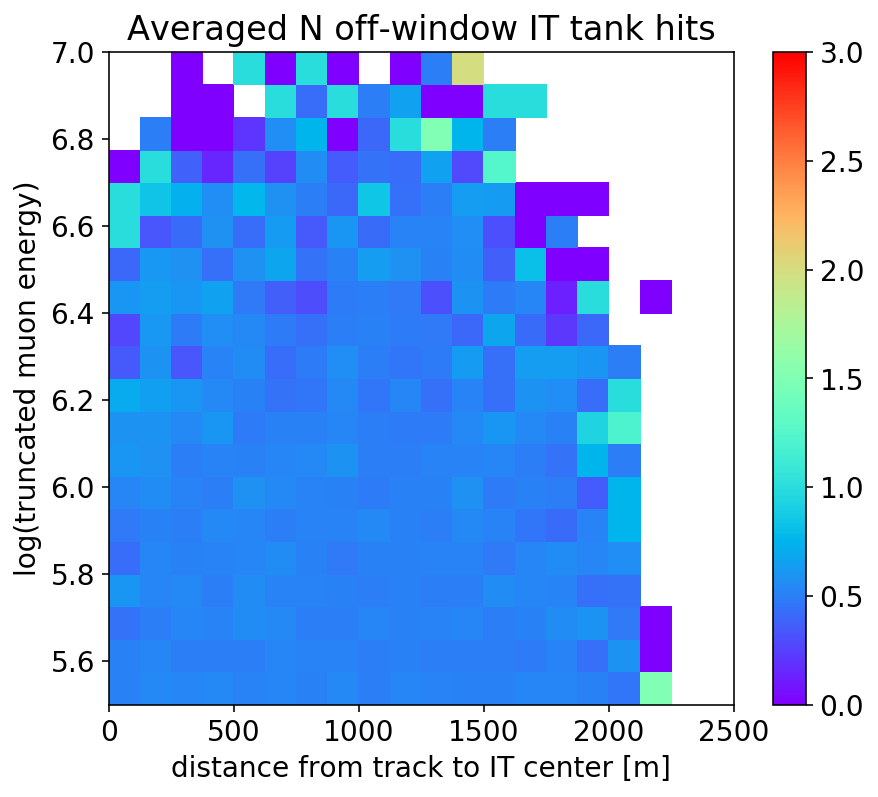

In [113]:
" ===== 1. IT Ineff from Data  ===== "
" ----- IT ineff from data -----"
n_ = 20
emax = 7
e_spacing = (emax-5.5)/n_
d_spacing = (2500)/n_

Dist = []
Energy = []
Npulse_avg_in_window = []
Npulse_avg_off_window = []
for energy in np.linspace(5.5,emax,n_): # in each energy range [e1,e2]
    for dist in np.linspace(0,2500,n_): # in each dist range
        # energy cut  

        CUT_energy = (truncated_muon_e_data_burn>10**energy)&(truncated_muon_e_data_burn<10**(energy+e_spacing))
        CUT_dist = (d_to_IT_center_data_burn>dist)&(d_to_IT_center_data_burn<(dist+d_spacing))
        CUT = CUT_energy & CUT_dist

        closest_d_binned = d_to_IT_center_data_burn[CUT]
        Npulse_in_window_data_burn_binned = Npulse_in_window_data_burn[CUT] 
        Npulse_off_window_data_burn_binned = Npulse_off_window_data_burn[CUT] 

        Npulse_avg_in_window = np.append(Npulse_avg_in_window, np.mean(Npulse_in_window_data_burn_binned) ) 
        Npulse_avg_off_window = np.append(Npulse_avg_off_window, np.mean(Npulse_off_window_data_burn_binned) ) 

        Dist = np.append(Dist, dist)
        Energy = np.append(Energy,energy)
        
my_cmap = matplotlib.cm.get_cmap('rainbow')
my_cmap.set_under('w')

plt.figure(figsize=(7,6))
# plt.plot(t,lowstat,color='black')
h,yy,xx,img=plt.hist2d(Dist,Energy,bins=[n_,n_],weights=Npulse_avg_in_window,cmap=my_cmap,vmin=0.0) # ,range=[[0,2500],[5.5,emax]],range=[[0,2500],[5.5,emax]],bins=[n_,n_],
plt.colorbar()
# CS=plt.contour(h.transpose(),extent=[0,2500,5.5,emax],lw=1,levels=[0.2,0.4,0.6,0.8])
# plt.clabel(CS,inline=1,fmt='%1.1f',fontsize=10)
# plt.clim(0,1)
plt.xlabel('distance from track to IT center [m]')
plt.ylabel('log(truncated muon energy)')
plt.xlim(0,2500)
plt.ylim(5.5,emax)
plt.title('Averaged N in-window IT tank hits')

plt.figure(figsize=(7,6))
# plt.plot(t,lowstat,color='black')
my_cmap = matplotlib.cm.get_cmap('rainbow')
my_cmap.set_under('w')
h,yy,xx,img=plt.hist2d(Dist,Energy,bins=[n_,n_],weights=Npulse_avg_off_window,cmap=my_cmap,vmin=0.0) # ,range=[[0,2500],[5.5,7]],range=[[0,2500],[5.5,7]],bins=[n_,n_],
plt.colorbar()
# CS=plt.contour(h.transpose(),extent=[0,2500,5.5,7],lw=1,levels=[0.2,0.4,0.6,0.8])
# plt.clabel(CS,inline=1,fmt='%1.1f',fontsize=10)
plt.clim(0,3)
plt.xlabel('distance from track to IT center [m]')
plt.ylabel('log(truncated muon energy)')
plt.xlim(0,2500)
plt.ylim(5.5,7)
plt.title('Averaged N off-window IT tank hits')

plt.show()

In [117]:
" ===== 1. IT Ineff from Data  ===== "
" ----- IT ineff from data -----"
n_ = 20
emax = 7
e_spacing = (emax-5.5)/n_
d_spacing = (2500)/n_

Dist = []
Energy = []
Npulse_avg_in_window = []
Npulse_avg_off_window = []
for energy in np.linspace(5.5,emax,n_): # in each energy range [e1,e2]
    for dist in np.linspace(0,2500,n_): # in each dist range
        # energy cut  

        CUT_energy = (truncated_muon_e_data_burn>10**energy)&(truncated_muon_e_data_burn<10**(energy+e_spacing))
        CUT_dist = (d_to_IT_center_data_burn>dist)&(d_to_IT_center_data_burn<(dist+d_spacing))
        CUT = CUT_energy & CUT_dist

        closest_d_binned = d_to_IT_center_data_burn[CUT]
        Npulse_in_window_data_burn_binned = Npulse_in_window_data_burn[CUT] 
        Npulse_off_window_data_burn_binned = Npulse_off_window_data_burn[CUT] 
        
        print(np.min(Npulse_in_window_data_burn_binned))
        Npulse_avg_in_window = np.append(Npulse_avg_in_window, np.min(Npulse_in_window_data_burn_binned) ) 
        Npulse_avg_off_window = np.append(Npulse_avg_off_window, np.min(Npulse_off_window_data_burn_binned) ) 

        Dist = np.append(Dist, dist)
        Energy = np.append(Energy,energy)
        
my_cmap = matplotlib.cm.get_cmap('rainbow')
my_cmap.set_under('w')

plt.figure(figsize=(7,6))
# plt.plot(t,lowstat,color='black')
h,yy,xx,img=plt.hist2d(Dist,Energy,bins=[n_,n_],weights=Npulse_avg_in_window,cmap=my_cmap,vmin=0.0) # ,range=[[0,2500],[5.5,emax]],range=[[0,2500],[5.5,emax]],bins=[n_,n_],
plt.colorbar()
# CS=plt.contour(h.transpose(),extent=[0,2500,5.5,emax],lw=1,levels=[0.2,0.4,0.6,0.8])
# plt.clabel(CS,inline=1,fmt='%1.1f',fontsize=10)
# plt.clim(0,1)
plt.xlabel('distance from track to IT center [m]')
plt.ylabel('log(truncated muon energy)')
plt.xlim(0,2500)
plt.ylim(5.5,emax)
plt.title('Minimum N in-window IT tank hits')

plt.figure(figsize=(7,6))
# plt.plot(t,lowstat,color='black')
my_cmap = matplotlib.cm.get_cmap('rainbow')
my_cmap.set_under('w')
h,yy,xx,img=plt.hist2d(Dist,Energy,bins=[n_,n_],weights=Npulse_avg_off_window,cmap=my_cmap,vmin=0.0) # ,range=[[0,2500],[5.5,7]],range=[[0,2500],[5.5,7]],bins=[n_,n_],
plt.colorbar()
# CS=plt.contour(h.transpose(),extent=[0,2500,5.5,7],lw=1,levels=[0.2,0.4,0.6,0.8])
# plt.clabel(CS,inline=1,fmt='%1.1f',fontsize=10)
plt.clim(0,3)
plt.xlabel('distance from track to IT center [m]')
plt.ylabel('log(truncated muon energy)')
plt.xlim(0,2500)
plt.ylim(5.5,7)
plt.title('Minimum N off-window IT tank hits')

plt.show()

5.0
12.0
7.0
5.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


ValueError: zero-size array to reduction operation minimum which has no identity

In [121]:
" ===== 1. IT Ineff from Data  ===== "
" ----- IT ineff from data -----"
n_ = 20
emax = 7
e_spacing = (emax-5.5)/n_
d_spacing = (2500)/n_

Dist = []
Energy = []
Npulse_avg_in_window = []
Npulse_avg_off_window = []
for energy in np.linspace(5.5,emax,n_): # in each energy range [e1,e2]
    for dist in np.linspace(0,2500,n_): # in each dist range
        # energy cut  

        CUT_energy = (truncated_muon_e_data_burn>10**energy)&(truncated_muon_e_data_burn<10**(energy+e_spacing))
        CUT_dist = (d_to_IT_center_data_burn>dist)&(d_to_IT_center_data_burn<(dist+d_spacing))
        CUT = CUT_energy & CUT_dist

        closest_d_binned = d_to_IT_center_data_burn[CUT]
        Npulse_in_window_data_burn_binned = Npulse_in_window_data_burn[CUT] 
        Npulse_off_window_data_burn_binned = Npulse_off_window_data_burn[CUT] 
        
#         print(np.min(Npulse_in_window_data_burn_binned))
        Npulse_avg_in_window = np.append(Npulse_avg_in_window, np.max(Npulse_in_window_data_burn_binned) ) 
        Npulse_avg_off_window = np.append(Npulse_avg_off_window, np.max(Npulse_off_window_data_burn_binned) ) 

        Dist = np.append(Dist, dist)
        Energy = np.append(Energy,energy)
        
my_cmap = matplotlib.cm.get_cmap('rainbow')
my_cmap.set_under('w')

plt.figure(figsize=(7,6))
# plt.plot(t,lowstat,color='black')
h,yy,xx,img=plt.hist2d(Dist,Energy,bins=[n_,n_],weights=Npulse_avg_in_window,cmap=my_cmap,vmin=0.0) # ,range=[[0,2500],[5.5,emax]],range=[[0,2500],[5.5,emax]],bins=[n_,n_],
plt.colorbar()
# CS=plt.contour(h.transpose(),extent=[0,2500,5.5,emax],lw=1,levels=[0.2,0.4,0.6,0.8])
# plt.clabel(CS,inline=1,fmt='%1.1f',fontsize=10)
# plt.clim(0,1)
plt.xlabel('distance from track to IT center [m]')
plt.ylabel('log(truncated muon energy)')
plt.xlim(0,2500)
plt.ylim(5.5,emax)
plt.title('Maximum N in-window IT tank hits')

plt.figure(figsize=(7,6))
# plt.plot(t,lowstat,color='black')
my_cmap = matplotlib.cm.get_cmap('rainbow')
my_cmap.set_under('w')
h,yy,xx,img=plt.hist2d(Dist,Energy,bins=[n_,n_],weights=Npulse_avg_off_window,cmap=my_cmap,vmin=0.0) # ,range=[[0,2500],[5.5,7]],range=[[0,2500],[5.5,7]],bins=[n_,n_],
plt.colorbar()
# CS=plt.contour(h.transpose(),extent=[0,2500,5.5,7],lw=1,levels=[0.2,0.4,0.6,0.8])
# plt.clabel(CS,inline=1,fmt='%1.1f',fontsize=10)
plt.clim(0,3)
plt.xlabel('distance from track to IT center [m]')
plt.ylabel('log(truncated muon energy)')
plt.xlim(0,2500)
plt.ylim(5.5,7)
plt.title('Maximum N off-window IT tank hits')

plt.show()

ValueError: zero-size array to reduction operation maximum which has no identity

In [120]:
np.mean([])

nan